# 부산 관광지별 유입도시별 카드매출 현황

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.unicode_minus'] = False

In [4]:
df = pd.read_csv("BC_BS_TRRSRT_INFLOW_CTPRVN_ACCTO_CARD_UTILIIZA_LIST_202112.csv")

In [5]:
df.head

<bound method NDFrame.head of                     PLC_NM CTPR_NM  CARD_USE_AMT  CARD_UTILIIZA_CAS_CO  \
0     BIFF광장&용두산공원&보수동책방골목      경남   638753571.0                 30244   
1     BIFF광장&용두산공원&보수동책방골목      경기   385638884.0                 20400   
2     BIFF광장&용두산공원&보수동책방골목      서울   326921210.0                 19243   
3     BIFF광장&용두산공원&보수동책방골목      울산   158627000.0                  7658   
4     BIFF광장&용두산공원&보수동책방골목      경북   119875199.0                  6126   
...                    ...     ...           ...                   ...   
2621               흰여울문화마을      전남     4141008.0                   395   
2622               흰여울문화마을      전북     3082092.0                   245   
2623               흰여울문화마을      제주      995787.0                    85   
2624               흰여울문화마을      충남     8640169.0                   665   
2625               흰여울문화마을      충북    11258312.0                   875   

     BASE_QUARTER  
0       2020년 1분기  
1       2020년 1분기  
2       2020년 1분기  
3

In [6]:
df.columns

Index(['PLC_NM', 'CTPR_NM', 'CARD_USE_AMT', 'CARD_UTILIIZA_CAS_CO',
       'BASE_QUARTER'],
      dtype='object')

# 컬럼 정의
    PLC_NM                      장소명
    CTPR_NM                     시도명        
    CARD_USE_AMT          카드이용금액
    CARD_UTILLIZA_CAS_CO  카드이용건수
    BASE_QUARTER              기준분기

## 분기 기준 카드 사용량 내림차순 정렬

In [7]:
df_sort_value = df.sort_values(by=['BASE_QUARTER', 'CARD_USE_AMT'], ascending=[True, False])
df_sort_value

,PLC_NM,CTPR_NM,CARD_USE_AMT,CARD_UTILIIZA_CAS_CO,BASE_QUARTER
160,센텀시티(신세계센텀 등),경기,4.631194e+10,82402,2020년 1분기
126,부산서면,경남,3.149759e+10,596832,2020년 1분기
158,센텀시티(신세계센텀 등),경남,3.100836e+10,230873,2020년 1분기
161,센텀시티(신세계센텀 등),울산,1.047322e+10,76032,2020년 1분기
159,센텀시티(신세계센텀 등),서울,6.505824e+09,104832,2020년 1분기
...,...,...,...,...,...
2386,렛츠런파크,경기,2.515000e+04,5,2021년 3분기
2432,부산시민공원,세종,1.518000e+04,5,2021년 3분기
2436,부산시민공원,전북,1.518000e+04,5,2021년 3분기
2517,을숙도,세종,7.064000e+03,10,2021년 3분기


### 각 년도별 개별 파일로 분할하여 분석(2020년도는 1~4분기, 2021년도는 3분기 까지의 데이터만 존재)

In [8]:
df_2020 = df_sort_value[(df_sort_value.BASE_QUARTER=='2020년 1분기') | (df_sort_value.BASE_QUARTER=='2020년 2분기') | (df_sort_value.BASE_QUARTER=='2020년 3분기') | (df_sort_value.BASE_QUARTER=='2020년 4분기') ]
df_2020

,PLC_NM,CTPR_NM,CARD_USE_AMT,CARD_UTILIIZA_CAS_CO,BASE_QUARTER
160,센텀시티(신세계센텀 등),경기,4.631194e+10,82402,2020년 1분기
126,부산서면,경남,3.149759e+10,596832,2020년 1분기
158,센텀시티(신세계센텀 등),경남,3.100836e+10,230873,2020년 1분기
161,센텀시티(신세계센텀 등),울산,1.047322e+10,76032,2020년 1분기
159,센텀시티(신세계센텀 등),서울,6.505824e+09,104832,2020년 1분기
...,...,...,...,...,...
1050,국립해양박물관,대전,7.665000e+04,10,2020년 4분기
1049,국립해양박물관,강원,5.876500e+04,10,2020년 4분기
1218,을숙도,세종,5.876500e+04,20,2020년 4분기
1138,부산시민공원,세종,1.941800e+04,5,2020년 4분기


In [9]:
df_2021 = df_sort_value[(df_sort_value.BASE_QUARTER=='2021년 1분기') | (df_sort_value.BASE_QUARTER=='2021년 2분기') | (df_sort_value.BASE_QUARTER=='2021년 3분기') | (df_sort_value.BASE_QUARTER=='2021년 4분기') ]
df_2021

,PLC_NM,CTPR_NM,CARD_USE_AMT,CARD_UTILIIZA_CAS_CO,BASE_QUARTER
1437,센텀시티(신세계센텀 등),경남,3.073319e+10,155598,2021년 1분기
1407,부산서면,경남,2.189746e+10,285711,2021년 1분기
1439,센텀시티(신세계센텀 등),울산,1.063208e+10,52094,2021년 1분기
1438,센텀시티(신세계센텀 등),서울,6.001751e+09,66009,2021년 1분기
1442,센텀시티(신세계센텀 등),대구,5.282961e+09,23570,2021년 1분기
...,...,...,...,...,...
2386,렛츠런파크,경기,2.515000e+04,5,2021년 3분기
2432,부산시민공원,세종,1.518000e+04,5,2021년 3분기
2436,부산시민공원,전북,1.518000e+04,5,2021년 3분기
2517,을숙도,세종,7.064000e+03,10,2021년 3분기


In [10]:
df_2020.to_csv('./2020년_카드 이용금액 기준 내림차순 정렬.csv', index=False, encoding='euc-kr')

In [11]:
df_2021.to_csv('./2021년_카드 이용금액 기준 내림차순 정렬.csv', index=False, encoding='euc-kr')

In [12]:
df_2020['CTPR_NM'].value_counts()

경남    85
서울    85
경기    84
대구    84
울산    83
경북    83
대전    83
인천    82
충남    82
전남    81
광주    81
전북    81
충북    81
강원    81
제주    80
세종    79
Name: CTPR_NM, dtype: int64

In [13]:
df_2020.groupby("CTPR_NM")['CARD_USE_AMT'].sum().sort_values(ascending=False).head(3)

CTPR_NM
경남    3.140582e+11
경기    1.177356e+11
서울    9.612240e+10
Name: CARD_USE_AMT, dtype: float64

In [14]:
card_max_2020 = df_2020.groupby("CTPR_NM")['CARD_USE_AMT'].sum().max()
card_max_2021 = df_2021.groupby("CTPR_NM")['CARD_USE_AMT'].sum().max()

print(card_max_2020, card_max_2021)
print(card_max_2021/card_max_2020)

314058206893.0 991578214618.0
3.157307126050783


### 2020년과 2021년의 단순 카드 사용 내역량을 비교 했을때, 약 3배정도 증가했음을 알 수 있음

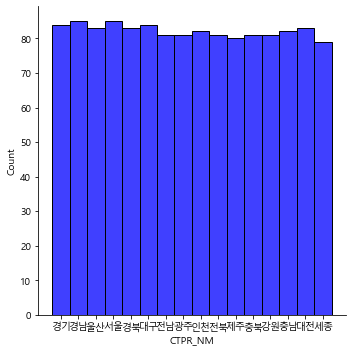

In [15]:
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

sns.displot(df_2020['CTPR_NM'], color='blue')
plt.show()

### 카드 사용내역 기준 방문자의 출신 지역 확인 결과, 지역마다 비슷한 수의 사람이 방문한 것을 확인

In [16]:
df_202002 = df_sort_value[(df_sort_value.BASE_QUARTER=='2020년 2분기')]
df_202002['CTPR_NM'].value_counts()

경남    21
서울    21
울산    20
경북    20
대구    20
경기    20
전남    20
전북    20
충남    20
인천    20
제주    20
충북    20
대전    20
광주    19
강원    19
세종    19
Name: CTPR_NM, dtype: int64

In [17]:
df_202003 = df_sort_value[(df_sort_value.BASE_QUARTER=='2020년 3분기')]
df_202003['CTPR_NM'].value_counts()

경남    21
서울    21
경기    21
대구    21
울산    20
경북    20
광주    20
전남    20
대전    20
인천    20
제주    20
충남    20
강원    20
세종    20
전북    19
충북    19
Name: CTPR_NM, dtype: int64

In [18]:
df_202004 = df_sort_value[(df_sort_value.BASE_QUARTER=='2020년 4분기')]
df_202004['CTPR_NM'].value_counts()

경남    22
울산    22
서울    22
경북    22
경기    22
대구    22
대전    22
광주    21
인천    21
전북    21
충북    21
강원    21
충남    21
전남    20
제주    20
세종    20
Name: CTPR_NM, dtype: int64

In [20]:
df_202002.groupby("CTPR_NM")['CARD_USE_AMT'].sum().sort_values(ascending=False).head(3)

CTPR_NM
경남    7.914719e+10
울산    2.161973e+10
서울    2.105338e+10
Name: CARD_USE_AMT, dtype: float64

In [21]:
df_202003.groupby("CTPR_NM")['CARD_USE_AMT'].sum().sort_values(ascending=False).head(3)

CTPR_NM
경남    8.243352e+10
서울    3.091595e+10
경기    2.541541e+10
Name: CARD_USE_AMT, dtype: float64

In [23]:
df_202004.groupby("CTPR_NM")['CARD_USE_AMT'].sum().sort_values(ascending=False).head(3)

CTPR_NM
경남    8.218819e+10
서울    2.483395e+10
울산    2.193758e+10
Name: CARD_USE_AMT, dtype: float64

In [85]:
# 방문 장소 카운트

In [24]:
df_2020['PLC_NM'].value_counts()

광안리해수욕장                   80
센텀시티(신세계센텀 등)             64
부산서면                      64
부산시민공원                    64
태종대                       64
일광해수욕장                    64
흰여울문화마을                   64
감천문화마을                    64
송정해수욕장                    64
다대포 해수욕장(꿈의 낙조분수, 몰운대)    64
오륙도&이기대 갈맷길               64
송도해수욕장                    64
동백섬&누리마루APEC하우스           64
마린시티 카페거리                 64
BIFF광장&용두산공원&보수동책방골목      64
전포카페거리                    64
해운대해수욕장                   64
자갈치·국제시장·부평깡통야시장          64
을숙도                       63
국립해양박물관                   56
렛츠런파크                     28
Name: PLC_NM, dtype: int64

In [25]:
df_2020.groupby("PLC_NM")['CARD_USE_AMT'].sum().sort_values(ascending=False).head(3)

PLC_NM
센텀시티(신세계센텀 등)    4.004866e+11
부산서면             2.426736e+11
광안리해수욕장          3.881081e+10
Name: CARD_USE_AMT, dtype: float64

In [26]:
df_202002.groupby("PLC_NM")['CARD_USE_AMT'].sum().sort_values(ascending=False).head(3)

PLC_NM
센텀시티(신세계센텀 등)       8.955516e+10
부산서면                5.796255e+10
자갈치·국제시장·부평깡통야시장    8.790329e+09
Name: CARD_USE_AMT, dtype: float64

In [27]:
df_202003.groupby("PLC_NM")['CARD_USE_AMT'].sum().sort_values(ascending=False).head(3)

PLC_NM
센텀시티(신세계센텀 등)    9.828940e+10
부산서면             6.610712e+10
해운대해수욕장          1.398231e+10
Name: CARD_USE_AMT, dtype: float64

In [28]:
df_202004.groupby("PLC_NM")['CARD_USE_AMT'].sum().sort_values(ascending=False).head(3)

PLC_NM
센텀시티(신세계센텀 등)    9.959738e+10
부산서면             6.005765e+10
광안리해수욕장          1.198918e+10
Name: CARD_USE_AMT, dtype: float64

# 년도 별(2020, 2021) 집계

In [29]:
df_2020.groupby("PLC_NM")['CARD_USE_AMT'].sum().sort_values(ascending=False) #장소별 카드 사용 금액

PLC_NM
센텀시티(신세계센텀 등)             4.004866e+11
부산서면                      2.426736e+11
광안리해수욕장                   3.881081e+10
해운대해수욕장                   3.800225e+10
자갈치·국제시장·부평깡통야시장          3.575614e+10
전포카페거리                    1.061137e+10
동백섬&누리마루APEC하우스           9.013202e+09
송도해수욕장                    8.659811e+09
마린시티 카페거리                 8.517654e+09
BIFF광장&용두산공원&보수동책방골목      7.604638e+09
송정해수욕장                    2.993533e+09
오륙도&이기대 갈맷길               2.794206e+09
다대포 해수욕장(꿈의 낙조분수, 몰운대)    2.653237e+09
태종대                       1.587345e+09
일광해수욕장                    1.056767e+09
흰여울문화마을                   1.002473e+09
감천문화마을                    9.206780e+08
렛츠런파크                     9.184546e+07
부산시민공원                    8.244998e+07
을숙도                       7.341665e+07
국립해양박물관                   5.233984e+07
Name: CARD_USE_AMT, dtype: float64

In [30]:
df_2020.groupby("PLC_NM")['CARD_UTILIIZA_CAS_CO'].sum().sort_values(ascending=False) #장소별 카드 사용 횟수

PLC_NM
부산서면                      5249177
센텀시티(신세계센텀 등)             2932032
광안리해수욕장                   1491631
자갈치·국제시장·부평깡통야시장           936046
해운대해수욕장                    887820
전포카페거리                     496264
BIFF광장&용두산공원&보수동책방골목       401649
송도해수욕장                     345196
마린시티 카페거리                  198422
동백섬&누리마루APEC하우스            177519
송정해수욕장                     151532
다대포 해수욕장(꿈의 낙조분수, 몰운대)     146069
태종대                         84921
오륙도&이기대 갈맷길                 77518
흰여울문화마을                     77436
감천문화마을                      76351
일광해수욕장                      47706
을숙도                         22222
부산시민공원                      10727
렛츠런파크                        4469
국립해양박물관                      4194
Name: CARD_UTILIIZA_CAS_CO, dtype: int64

In [31]:
df_2020.groupby("PLC_NM")['CARD_USE_AMT'].sum().sort_values(ascending=False).head(5) #장소별 카드 사용 금액 상위 5개

PLC_NM
센텀시티(신세계센텀 등)       4.004866e+11
부산서면                2.426736e+11
광안리해수욕장             3.881081e+10
해운대해수욕장             3.800225e+10
자갈치·국제시장·부평깡통야시장    3.575614e+10
Name: CARD_USE_AMT, dtype: float64

In [32]:
df_2020.groupby("PLC_NM")['CARD_UTILIIZA_CAS_CO'].sum().sort_values(ascending=False).head(5) #장소별 카드 사용 횟수 상위 5개

PLC_NM
부산서면                5249177
센텀시티(신세계센텀 등)       2932032
광안리해수욕장             1491631
자갈치·국제시장·부평깡통야시장     936046
해운대해수욕장              887820
Name: CARD_UTILIIZA_CAS_CO, dtype: int64

In [33]:
df_2021.groupby("PLC_NM")['CARD_USE_AMT'].sum().sort_values(ascending=False) #장소별 카드 사용 금액

PLC_NM
센텀시티(신세계센텀 등)             8.867751e+11
부산서면                      4.496194e+11
자갈치·국제시장·부평깡통야시장          6.542642e+10
해운대해수욕장                   4.376762e+10
광안리해수욕장                   3.803849e+10
전포카페거리                    1.819087e+10
동백섬&누리마루APEC하우스           1.190627e+10
BIFF광장&용두산공원&보수동책방골목      1.169730e+10
오륙도&이기대 갈맷길               1.082435e+10
마린시티 카페거리                 9.623692e+09
송도해수욕장                    9.034227e+09
다대포 해수욕장(꿈의 낙조분수, 몰운대)    7.753384e+09
송정해수욕장                    2.866552e+09
감천문화마을                    1.509928e+09
태종대                       1.486953e+09
일광해수욕장                    1.398643e+09
흰여울문화마을                   1.248609e+09
부산시민공원                    2.061207e+08
을숙도                       9.785996e+07
국립해양박물관                   3.908242e+07
렛츠런파크                     7.005227e+06
Name: CARD_USE_AMT, dtype: float64

In [34]:
df_2021.groupby("PLC_NM")['CARD_UTILIIZA_CAS_CO'].sum().sort_values(ascending=False) #장소별 카드 사용 금액

PLC_NM
부산서면                      9216508
센텀시티(신세계센텀 등)             6533849
자갈치·국제시장·부평깡통야시장          1668201
광안리해수욕장                   1460635
해운대해수욕장                    915093
전포카페거리                     781283
BIFF광장&용두산공원&보수동책방골목       526088
송도해수욕장                     440283
다대포 해수욕장(꿈의 낙조분수, 몰운대)     428192
마린시티 카페거리                  297625
오륙도&이기대 갈맷길                230872
송정해수욕장                     215401
동백섬&누리마루APEC하우스            187867
감천문화마을                     106961
흰여울문화마을                    102491
태종대                         84629
일광해수욕장                      63775
부산시민공원                      28243
을숙도                         26304
국립해양박물관                      3980
렛츠런파크                         255
Name: CARD_UTILIIZA_CAS_CO, dtype: int64

In [35]:
df_2021.groupby("PLC_NM")['CARD_USE_AMT'].sum().sort_values(ascending=False).head(5) #장소별 카드 사용 금액 상위 5개

PLC_NM
센텀시티(신세계센텀 등)       8.867751e+11
부산서면                4.496194e+11
자갈치·국제시장·부평깡통야시장    6.542642e+10
해운대해수욕장             4.376762e+10
광안리해수욕장             3.803849e+10
Name: CARD_USE_AMT, dtype: float64

In [36]:
df_2021.groupby("PLC_NM")['CARD_UTILIIZA_CAS_CO'].sum().sort_values(ascending=False).head(5) #장소별 카드 사용 금액 상위 5개

PLC_NM
부산서면                9216508
센텀시티(신세계센텀 등)       6533849
자갈치·국제시장·부평깡통야시장    1668201
광안리해수욕장             1460635
해운대해수욕장              915093
Name: CARD_UTILIIZA_CAS_CO, dtype: int64

### 각 연도별 사용금액 대비 사용량 확인 결과 비례관계가 성립함을 알 수 있음

In [37]:
# dimension
df.shape

(2626, 5)

In [38]:
# 결측치
df.isnull().sum()

PLC_NM                  0
CTPR_NM                 0
CARD_USE_AMT            0
CARD_UTILIIZA_CAS_CO    0
BASE_QUARTER            0
dtype: int64

In [39]:
# information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2626 entries, 0 to 2625
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PLC_NM                2626 non-null   object 
 1   CTPR_NM               2626 non-null   object 
 2   CARD_USE_AMT          2626 non-null   float64
 3   CARD_UTILIIZA_CAS_CO  2626 non-null   int64  
 4   BASE_QUARTER          2626 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 102.7+ KB


In [40]:
# text 변수 확인

df['PLC_NM'][0]

'BIFF광장&용두산공원&보수동책방골목'

In [41]:
df['PLC_NM'][100]

'렛츠런파크'

In [42]:
!pip install konlpy==0.5.2 jpype1 Jpype1-py3

In [43]:
# 정규 표현식 함수 정의

import re

def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result


In [44]:
df['PLC_NM'][0]

'BIFF광장&용두산공원&보수동책방골목'

In [45]:
apply_regular_expression(df['PLC_NM'][0])

'광장용두산공원보수동책방골목'

In [46]:
from konlpy.tag import Okt
from collections import Counter

In [47]:
apply_regular_expression(df['PLC_NM'][0])

'광장용두산공원보수동책방골목'

In [48]:
okt = Okt()  # 명사 형태소 추출 함수
nouns = okt.nouns(apply_regular_expression(df['PLC_NM'][0]))
nouns

['광장', '용두산', '공원', '보수동책방골목']

In [49]:
# 말뭉치 생성
corpus = "".join(df['PLC_NM'].tolist())
corpus

'BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목BIFF광장&용두산공원&보수동책방골목감천문화마을감천문화마을감천문화마을감천문화마을감천문화마을감천문화마을감천문화마을감천문화마을감천문화마을감천문화마을감천문화마을감천문화마을감천문화마을감천문화마을감천문화마을감천문화마을광안리해수욕장광안리해수욕장광안리해수욕장광안리해수욕장광안리해수욕장광안리해수욕장광안리해수욕장광안리해수욕장광안리해수욕장광안리해수욕장광안리해수욕장광안리해수욕장광안리해수욕장광안리해수욕장광안리해수욕장광안리해수욕장국립해양박물관국립해양박물관국립해양박물관국립해양박물관국립해양박물관국립해양박물관국립해양박물관국립해양박물관국립해양박물관국립해양박물관국립해양박물관국립해양박물관국립해양박물관국립해양박물관국립해양박물관국립해양박물관다대포 해수욕장(꿈의 낙조분수, 몰운대)다대포 해수욕장(꿈의 낙조분수, 몰운대)다대포 해수욕장(꿈의 낙조분수, 몰운대)다대포 해수욕장(꿈의 낙조분수, 몰운대)다대포 해수욕장(꿈의 낙조분수, 몰운대)다대포 해수욕장(꿈의 낙조분수, 몰운대)다대포 해수욕장(꿈의 낙조분수, 몰운대)다대포 해수욕장(꿈의 낙조분수, 몰운대)다대포 해수욕장(꿈의 낙조분수, 몰운대)다대포 해수욕장(꿈의 낙조분수, 몰운대)다대포 해수욕장(꿈의 낙조분수, 몰운대)다대포 해수욕장(꿈의 낙조분수, 몰운대)다대포 해수욕장(꿈의 낙조분수, 몰운대)다대포 해수욕장(꿈의 낙조분수, 몰운대)다대포 해수욕장(꿈의 낙조분수, 몰운대)다대포 해수욕장(꿈의 낙조분수, 몰운대)동백섬&누리마

In [50]:
# 정규 표현식 적용
apply_regular_expression(corpus)

'광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목광장용두산공원보수동책방골목감천문화마을감천문화마을감천문화마을감천문화마을감천문화마을감천문화마을감천문화마을감천문화마을감천문화마을감천문화마을감천문화마을감천문화마을감천문화마을감천문화마을감천문화마을감천문화마을광안리해수욕장광안리해수욕장광안리해수욕장광안리해수욕장광안리해수욕장광안리해수욕장광안리해수욕장광안리해수욕장광안리해수욕장광안리해수욕장광안리해수욕장광안리해수욕장광안리해수욕장광안리해수욕장광안리해수욕장광안리해수욕장국립해양박물관국립해양박물관국립해양박물관국립해양박물관국립해양박물관국립해양박물관국립해양박물관국립해양박물관국립해양박물관국립해양박물관국립해양박물관국립해양박물관국립해양박물관국립해양박물관국립해양박물관국립해양박물관다대포 해수욕장꿈의 낙조분수 몰운대다대포 해수욕장꿈의 낙조분수 몰운대다대포 해수욕장꿈의 낙조분수 몰운대다대포 해수욕장꿈의 낙조분수 몰운대다대포 해수욕장꿈의 낙조분수 몰운대다대포 해수욕장꿈의 낙조분수 몰운대다대포 해수욕장꿈의 낙조분수 몰운대다대포 해수욕장꿈의 낙조분수 몰운대다대포 해수욕장꿈의 낙조분수 몰운대다대포 해수욕장꿈의 낙조분수 몰운대다대포 해수욕장꿈의 낙조분수 몰운대다대포 해수욕장꿈의 낙조분수 몰운대다대포 해수욕장꿈의 낙조분수 몰운대다대포 해수욕장꿈의 낙조분수 몰운대다대포 해수욕장꿈의 낙조분수 몰운대다대포 해수욕장꿈의 낙조분수 몰운대동백섬누리마루하우스동백섬누리마루하우스동백섬누리마루하우스동백섬누리마루하우스동백섬누리마루하우스동백섬누리마루하우스동백섬누리마루하우스동백섬누리마루하우스동백섬누리마루하우스동백섬누리마루하우스동백섬누리마루하우스동백섬누리마루하우스동백섬누리마루하우스동백섬누리마루하우스동백섬누리마루하우스동

In [51]:
# 전체 말뭉치(corpus)에서 명사 형태소 추출
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns)

['광장', '용두산', '보수동책방골목', '광장', '용두산', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '광장', '용두산', '공원', '보수동책방골목', '감천', '문화', '마을', '감천', '문화', '마을', '감천', '문화', '마을', '감천', '문화', '마을', '감천', '문화', '마을', '감천', '문화', '마을', '감천', '문화', '마을', '감천', '문화', '마을', '감천', '문화', '마을', '감천', '문화', '마을', '감천', '문화', '마을', '감천', '문화', '마을', '감천', '문화', '마을', '감천', '문화', '마을', '감천', '문화', '마을', '감천', '문화', '마을', '광안리해수욕장', '광안리해수욕장', '광안리해수욕장', '광안리해수욕장', '광안리해수욕장', '광안리해수욕장', '광안리해수욕장', '광안리해수욕장', '광안리해수욕장', '광안리해수욕장', '광안리해수욕장', '광안리해수욕장', '광안리해수욕장', '광안리해수욕장', '광안리해수욕장', '광안리해수욕장', '국립', '해양', '박물관', '국립', '해양', '박물관', '국립', '해양', '박물관', '국립', '해양'

In [52]:
# 빈도 탐색
counter = Counter(nouns)

In [53]:
counter.most_common(10)

[('문화', 262),
 ('마을', 262),
 ('카페', 262),
 ('거리', 262),
 ('광장', 131),
 ('용두산', 131),
 ('보수동책방골목', 131),
 ('감천', 131),
 ('광안리해수욕장', 131),
 ('해수욕장', 131)]

In [54]:
counter.most_common(5)

[('문화', 262), ('마을', 262), ('카페', 262), ('거리', 262), ('광장', 131)]

In [55]:
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

[('문화', 262),
 ('마을', 262),
 ('카페', 262),
 ('거리', 262),
 ('광장', 131),
 ('용두산', 131),
 ('보수동책방골목', 131),
 ('감천', 131),
 ('광안리해수욕장', 131),
 ('해수욕장', 131)]

In [56]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]

[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(df['PLC_NM'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [58]:
# 단어 리스트
word_list

['갈맷길',
 '감천',
 '거리',
 '공원',
 '광안리해수욕장',
 '광장',
 '국립',
 '국제',
 '깡통',
 '누리',
 '다대',
 '동백섬',
 '렛츠런',
 '마루',
 '마린시티',
 '마을',
 '문화',
 '민공',
 '박물관',
 '보수동책방골목',
 '부산',
 '부산시',
 '부평',
 '분수',
 '서면',
 '센텀',
 '센텀시티',
 '송도해수욕장',
 '송정해수욕장',
 '시장',
 '신세계',
 '야시장',
 '오륙도',
 '용두산',
 '을숙도',
 '이기대',
 '일광해수욕장',
 '자갈치',
 '카페',
 '태종대',
 '파크',
 '하우스',
 '해수욕장',
 '해양',
 '해운대해수욕장',
 '흰여울']

In [59]:
# 각 단어가 등장한 총 횟수
count_list

array([131, 131, 262, 131, 131, 131, 105, 131, 131, 131, 131, 131,  42,
       131, 131, 262, 262, 126, 105, 131, 131, 126, 131, 131, 131, 131,
       131, 131, 131, 131, 131, 131, 131, 131, 126, 131, 131, 131, 262,
       131,  42, 131, 131, 105, 131, 131], dtype=int64)

In [60]:
# 각 단어의 등장 횟수
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [61]:
bow_vect.shape

(2626, 46)

In [62]:
# "단어" - "총 등장 횟수" Matching

word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'갈맷길': 131,
 '감천': 131,
 '거리': 262,
 '공원': 131,
 '광안리해수욕장': 131,
 '광장': 131,
 '국립': 105,
 '국제': 131,
 '깡통': 131,
 '누리': 131,
 '다대': 131,
 '동백섬': 131,
 '렛츠런': 42,
 '마루': 131,
 '마린시티': 131,
 '마을': 262,
 '문화': 262,
 '민공': 126,
 '박물관': 105,
 '보수동책방골목': 131,
 '부산': 131,
 '부산시': 126,
 '부평': 131,
 '분수': 131,
 '서면': 131,
 '센텀': 131,
 '센텀시티': 131,
 '송도해수욕장': 131,
 '송정해수욕장': 131,
 '시장': 131,
 '신세계': 131,
 '야시장': 131,
 '오륙도': 131,
 '용두산': 131,
 '을숙도': 126,
 '이기대': 131,
 '일광해수욕장': 131,
 '자갈치': 131,
 '카페': 262,
 '태종대': 131,
 '파크': 42,
 '하우스': 131,
 '해수욕장': 131,
 '해양': 105,
 '해운대해수욕장': 131,
 '흰여울': 131}

In [63]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [64]:
print(tf_idf_vect.shape)

(2626, 46)


In [65]:
# 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])

  (0, 33)	0.5
  (0, 19)	0.5
  (0, 5)	0.5
  (0, 3)	0.5


In [66]:
# 모든 단어의 중요도 -- 0인 값까지 포함
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 46)
[[0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]]


In [67]:
vect.vocabulary_

{'광장': 5,
 '용두산': 33,
 '공원': 3,
 '보수동책방골목': 19,
 '감천': 1,
 '문화': 16,
 '마을': 15,
 '광안리해수욕장': 4,
 '국립': 6,
 '해양': 43,
 '박물관': 18,
 '다대': 10,
 '해수욕장': 42,
 '분수': 23,
 '동백섬': 11,
 '누리': 9,
 '마루': 13,
 '하우스': 41,
 '렛츠런': 12,
 '파크': 40,
 '마린시티': 14,
 '카페': 38,
 '거리': 2,
 '부산': 20,
 '서면': 24,
 '부산시': 21,
 '민공': 17,
 '센텀시티': 26,
 '신세계': 30,
 '센텀': 25,
 '송도해수욕장': 27,
 '송정해수욕장': 28,
 '오륙도': 32,
 '이기대': 35,
 '갈맷길': 0,
 '을숙도': 34,
 '일광해수욕장': 36,
 '자갈치': 37,
 '국제': 7,
 '시장': 29,
 '부평': 22,
 '깡통': 8,
 '야시장': 31,
 '태종대': 39,
 '해운대해수욕장': 44,
 '흰여울': 45}

In [68]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')

{5: '광장', 33: '용두산', 3: '공원', 19: '보수동책방골목', 1: '감천', 16: '문화', 15: '마을', 4: '광안리해수욕장', 6: '국립', 43:...


In [69]:
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter
from tqdm import tqdm